### The objective of this project is to utilize Markowitz mean-variance optimization (MVO) to allocate funds among a group of assets in order to generate the highest possible performance.

### Developed by Keyan Ahmadi 

In [1]:
#pip install cvxpy

In [2]:
# Importing the necessary libraries and data
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
#Load file and into dateframe

monthlyClosing_inSample = 'monthly_closings_2018_to_2020.csv'
monthlyClosing_outSample = 'monthly_closings_2021.csv'

df1 = pd.read_csv(monthlyClosing_inSample)
df2 = pd.read_csv(monthlyClosing_outSample)

# Printing the frist 5 rows of the DataFrame
print(df1.shape)
df1.head()

(36, 26)


,Date,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
0,2018-01-01,13.74,64.900764,27.397306,204.289993,9.464570,29.212917,65.913818,10.430466,53.549736,...,222.232788,218.483643,52.943863,7.32,164.870193,39.982342,60.957558,48.101372,102.605919,120.929955
1,2018-02-01,12.11,56.789257,26.595846,186.139999,9.257274,29.304205,61.587685,12.223202,50.842533,...,212.265274,205.409531,52.875637,5.83,162.738815,42.535130,54.352787,43.124111,102.988831,119.674240
2,2018-03-01,10.05,56.235203,25.398247,183.539993,9.667352,27.377983,60.756409,11.449066,51.999256,...,200.852341,192.592194,50.741047,6.96,155.848129,40.229286,54.898434,43.142376,98.057846,116.645149
3,2018-04-01,10.88,67.682632,25.379751,178.539993,9.806952,27.416567,58.421768,14.404930,49.542076,...,222.610748,170.544785,41.922886,7.93,156.890533,39.625057,60.538544,42.859261,96.996758,123.724594
4,2018-05-01,13.73,73.762344,25.130117,198.009995,10.212634,26.610199,57.699131,12.217362,51.278229,...,227.422699,173.036407,42.518581,6.71,165.790802,44.806568,62.351170,42.649212,95.902344,127.469086


In [4]:
# Printing the frist 5 rows of the DataFrame
print(df2.shape)
df2.head()

(12, 26)


,Date,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
0,2021-01-01,85.639999,19.984137,28.448484,253.830002,10.423653,28.948441,18.670000,13.260000,37.959999,...,327.984192,168.625778,17.170000,12.59,313.051849,130.984589,37.564899,48.648792,124.770065,191.758194
1,2021-02-01,84.510002,26.509365,31.750275,237.759995,11.581836,33.888718,26.750000,8.010000,47.939999,...,326.647034,168.049774,20.940001,10.28,312.633881,120.363693,46.000759,48.362968,143.737076,210.750427
2,2021-03-01,78.500000,26.519325,33.460136,226.729996,12.126281,37.774540,26.540001,10.210000,48.279999,...,365.828552,186.488373,23.900000,10.92,317.599945,121.428291,46.870140,45.987694,148.679062,210.421692
3,2021-04-01,81.620003,25.272585,35.789776,230.949997,11.423451,39.767548,27.959999,10.030000,46.919998,...,393.503174,190.805069,21.719999,11.38,336.794342,130.683289,47.686050,45.613171,150.222214,232.116791
4,2021-05-01,80.080002,25.870514,37.497345,213.960007,14.383254,41.592560,29.559999,26.120001,47.680000,...,406.448944,196.515472,24.240000,10.33,332.748688,123.873756,50.408760,45.573750,161.353668,225.895493


In [5]:
# Seeing how many null values are in each column
df1.isnull().sum(axis=0)

Date    0
AMD     0
OXY     0
XLF     0
BABA    0
F       0
BAC     0
CCL     0
AMC     0
DAL     0
FB      0
AMZN    0
GLD     0
TSLA    0
GOOG    0
USO     0
UNH     0
MMM     0
AAL     0
MULN    0
QQQ     0
AAPL    0
XLE     0
FXI     0
JPM     0
V       0
dtype: int64

In [6]:
# Seeing how many null values are in each column
df2.isnull().sum(axis=0)

Date    0
AMD     0
OXY     0
XLF     0
BABA    0
F       0
BAC     0
CCL     0
AMC     0
DAL     0
FB      0
AMZN    0
GLD     0
TSLA    0
GOOG    0
USO     0
UNH     0
MMM     0
AAL     0
MULN    0
QQQ     0
AAPL    0
XLE     0
FXI     0
JPM     0
V       0
dtype: int64

In [7]:
print("Number of observations in df1 is:",df1.shape[0])
print("Number of observations in df2 is:",df2.shape[0])

Number of observations in df1 is: 36
Number of observations in df2 is: 12


##### As we can see above, there is no NaN enteries for both DataFrames and therefore, there is no need for data cleaning 

In [8]:
#Removing the date column 
price = df1.iloc[:,1:]
price.head()

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
0,13.74,64.900764,27.397306,204.289993,9.464570,29.212917,65.913818,10.430466,53.549736,186.889999,...,222.232788,218.483643,52.943863,7.32,164.870193,39.982342,60.957558,48.101372,102.605919,120.929955
1,12.11,56.789257,26.595846,186.139999,9.257274,29.304205,61.587685,12.223202,50.842533,178.320007,...,212.265274,205.409531,52.875637,5.83,162.738815,42.535130,54.352787,43.124111,102.988831,119.674240
2,10.05,56.235203,25.398247,183.539993,9.667352,27.377983,60.756409,11.449066,51.999256,159.789993,...,200.852341,192.592194,50.741047,6.96,155.848129,40.229286,54.898434,43.142376,98.057846,116.645149
3,10.88,67.682632,25.379751,178.539993,9.806952,27.416567,58.421768,14.404930,49.542076,172.000000,...,222.610748,170.544785,41.922886,7.93,156.890533,39.625057,60.538544,42.859261,96.996758,123.724594
4,13.73,73.762344,25.130117,198.009995,10.212634,26.610199,57.699131,12.217362,51.278229,191.779999,...,227.422699,173.036407,42.518581,6.71,165.790802,44.806568,62.351170,42.649212,95.902344,127.469086


### 1.a)  Computing the matrix of monthly returns

In [9]:
#Calculating the monthly return as percent change of monthly closing values, reset indices 
ret = price.pct_change().iloc[1:,:]
ret.reset_index(inplace = True, drop = True)
print (ret.shape)
ret.head()

(35, 25)


,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
0,-0.118632,-0.124983,-0.029253,-0.088844,-0.021902,0.003125,-0.065633,0.171875,-0.050555,-0.045856,...,-0.044852,-0.059840,-0.001289,-0.203552,-0.012928,0.063848,-0.108350,-0.103474,0.003732,-0.010384
1,-0.170107,-0.009756,-0.045030,-0.013968,0.044298,-0.065732,-0.013497,-0.063333,0.022751,-0.103914,...,-0.053767,-0.062399,-0.040370,0.193825,-0.042342,-0.054210,0.010039,0.000424,-0.047879,-0.025311
2,0.082587,0.203563,-0.000728,-0.027242,0.014440,0.001409,-0.038426,0.258175,-0.047254,0.076413,...,0.108330,-0.114477,-0.173788,0.139368,0.006689,-0.015020,0.102737,-0.006562,-0.010821,0.060692
3,0.261949,0.089827,-0.009836,0.109051,0.041367,-0.029412,-0.012369,-0.151862,0.035044,0.115000,...,0.021616,0.014610,0.014209,-0.153846,0.056729,0.130763,0.029942,-0.004901,-0.011283,0.030265
4,0.091770,-0.006176,-0.021707,-0.063027,-0.041558,-0.025304,-0.072632,0.074324,-0.077993,0.013244,...,0.015858,0.004236,-0.126119,0.095380,0.009290,-0.005599,-0.001052,-0.079871,-0.026259,0.014863


### 1.b) Computing the covariance matrix and means of the percent change matrix

In [10]:
# Computing the covariance matrix of the percent change of prices (the "ret" DataFrame)
Q = ret.cov().to_numpy()
print ("shape of Q:", Q.shape)
Q

shape of Q: (25, 25)


array([[ 2.88430400e-02,  1.00470216e-02,  5.62869469e-03,
         8.22445990e-03,  3.93629170e-03,  7.29802407e-03,
         9.85516406e-03,  1.28548206e-02,  5.63253278e-03,
         8.89135357e-03,  1.03718544e-02,  6.17115734e-04,
         7.39235931e-03,  5.95711592e-03,  6.11673425e-03,
         6.38955654e-03,  5.02546219e-03,  7.88523928e-03,
         4.68181583e-03,  6.71548875e-03,  8.14888585e-03,
         7.93744138e-03,  4.94863669e-03,  5.28775058e-03,
         5.51874037e-03],
       [ 1.00470216e-02,  5.10928306e-02,  1.07829513e-02,
         5.24590600e-04,  1.16603389e-02,  1.36166011e-02,
         2.88528349e-02,  3.37220943e-02,  1.57081734e-02,
         8.10486915e-03,  8.44854712e-03, -2.92240477e-04,
         2.18248658e-02,  7.87454820e-03,  1.16224095e-02,
         6.34418858e-03,  6.84084842e-03,  1.98381917e-02,
         6.77433874e-02,  7.91904990e-03,  7.81472597e-03,
         2.26808944e-02,  5.06285180e-03,  1.08325655e-02,
         8.03641435e-03],
    

In [11]:
# Compute the mean for each column 
mu = np.array(np.mean(ret, axis = 0))
print( "mean of each column is:\n", mu)

# n corresponds to the number of columns in the DataFrame 
n = ret.shape[1] 

mean of each column is:
 [ 0.06967341 -0.01090347  0.00394663  0.00831277  0.00310364  0.00451495
 -0.01517963 -0.00816421 -0.00068068  0.01523853  0.02702516  0.01030652
  0.09088595  0.0138596  -0.01567046  0.01483785 -0.00527943 -0.02348367
  0.10211635  0.02007571  0.03939124 -0.00818404 -0.00042802  0.00834558
  0.01877771]


### 1.c) Solving for the minimum variance portfolio

In [12]:
# Creating optimization variable w1, 25 total variables 
w1 = cp.Variable(n)

# Computing the minimum variance portfolio 
# Form the problem , minimize
constraints1 = [sum(w1) == 1 , w1 >= 0]
prob1 = cp.Problem(cp.Minimize(cp.quad_form(w1, Q)) , [sum(w1) == 1 , w1 >= 0])

#Solving the Problem (porb1)
prob1.solve(verbose=False)
            
print("\nSolution status: ", prob1.status)
print("Solution optimal value: ", prob1.value)
print("Solution w: ")
# matrix of allocations which offers the minimum variance 
print(w1.value)


Solution status:  optimal
Solution optimal value:  0.0009278939303461067
Solution w: 
[ 2.34710887e-19  5.74347917e-20  8.04900960e-21  8.47491470e-20
  1.98798545e-20  1.09430917e-20  2.73061823e-20  2.72300037e-19
  5.54485957e-02  1.08374865e-19  8.96588053e-20  6.59194971e-01
 -6.72505302e-20  2.57095149e-20  1.76013193e-03  8.87191244e-02
  5.48842212e-02 -5.82455070e-20 -4.53773111e-19  3.42090218e-20
 -3.00375352e-20  8.76641979e-20  9.01180838e-02 -1.21200096e-21
  4.98748717e-02]


In [13]:
# Checking the Constraint
np.allclose(np.sum(w1.value),1)

True

In [14]:
w_minVar = w1.value

# Computing the variance of the portfolio
var_minVar = np.dot(w_minVar, np.dot(Q, w_minVar))

# Computing the return of the portfolio
ret_minVar = np.dot(mu, w_minVar)
print("Minimum variance portfolio:\n")
print("   Solution status =", prob1.status)
print("    Solution value =", prob1.value)
print("          Variance =", var_minVar)
print("   Expected return =", ret_minVar)
print("Standard deviation =", np.sqrt(var_minVar))

Minimum variance portfolio:

   Solution status = optimal
    Solution value = 0.0009278939303461067
          Variance = 0.0009278939303461067
   Expected return = 0.008653285914910979
Standard deviation = 0.03046135142021947


### 1.d) Solving for the maximum variance portfolio

In [15]:
# Create optimization variable w2, 25 total variables 
w2 = cp.Variable(n)

# Computing the maximum variance portfolio 
constraints2 = [sum(w2) == 1, w2 >= 0]
prob2 = cp.Problem(cp.Maximize(mu.T@w2), constraints2)
                   
# Solving the problem (prob2)
prob2.solve(verbose=False)

# Print results
print("\nSolution status: ", prob2.status)
print("Solution optimal value: ", prob2.value)
print("Solution w: ")
# matrix of allocations which offers the maximum variance 
print(w2.value)


Solution status:  optimal
Solution optimal value:  0.10211634693131111
Solution w: 
[4.00446549e-11 2.33109317e-11 2.11897368e-11 2.02514107e-11
 2.13526338e-11 2.10766681e-11 2.36702200e-11 2.30281295e-11
 2.20156300e-11 1.84127151e-11 1.42266925e-11 1.97676588e-11
 1.08469522e-09 1.88147929e-11 2.37055006e-11 1.85314364e-11
 2.26815434e-11 2.41212013e-11 9.99999998e-01 1.68558540e-11
 8.78989931e-12 2.30303345e-11 2.19747289e-11 2.02437383e-11
 1.72961027e-11]


In [16]:
w_maxRet = w2.value

# Computing the variance of the portfolio
var_maxRet = np.dot(w_maxRet, np.dot(Q, w_maxRet))

# Compuinge the return of the portfolio
ret_maxRet = np.dot(mu, w_maxRet)

print("Maximum return portfolio:\n")
print("   Solution status =", prob2.status)
print("    Solution value =", prob2.value)
print("   Expected return =", ret_maxRet)
print("          Variance =", var_maxRet)
print("Standard deviation =", np.sqrt(var_maxRet))

Maximum return portfolio:

   Solution status = optimal
    Solution value = 0.10211634693131111
   Expected return = 0.10211634693131111
          Variance = 0.33974851965067987
Standard deviation = 0.5828795069743659


### 1.e) Computing the classical Markowitz efficient frontier 

In [17]:
# Creating the tareget ranges for portfolio returns
targetLen = 50
targetRet = np.linspace(ret_minVar,ret_maxRet,targetLen)

In [18]:
# Defining the optimization problem and computing one portfolio on efficient frontier
w = cp.Variable(n)
eps = cp.Parameter()

constraints3 = [mu.T@w >= eps,sum(w) == 1,w >= 0]
prob3 = cp.Problem(cp.Minimize(cp.quad_form(w, Q)), constraints3)

In [19]:
# Compute efficient frontier
w_front_clas = []
var_front_clas = []
ret_front_clas = []
for epsilon in targetRet:
    eps.value = epsilon
    prob3.solve()
    w_front_clas.append(w.value)
    var_front_clas.append(np.dot(w.value, np.dot(Q, w.value)))
    ret_front_clas.append(np.dot(mu, w.value))

### 1.f) Computing the resampled efficient frontier

In [20]:
sample_size = ret.shape[0] 
repetition = 100    # How many simulated data are you gonna create      
                    # as you increase it, you will get better and better results 

# set variables for storing resuts

# Usa a random seed so that results will be consistent 
np.random.seed(10)

# Creating an empty list to house all the finding values 
w_front_re_Master = []
Q_resample_list = [] 
mu_resample_list = []
var_minVar_list = []
var_maxRet_list = []
ret_minVar_list = []
ret_maxRet_list = []

var_frontC_list = []
ret_frontC_list = []

# Resample by taking n (sample size) draws from the original input
for i in range(repetition):

    # resample by drawing from the multivariate normal distribution with mu and Q
    # using monte carlo simulation to compute new xsample 
    x_resample = np.random.multivariate_normal(mu, Q, 35)    

    ## Calculating the new mean vector (mu_resample) and new variance-covariance matrix
    ## (Q _resample)
    
    # resampled mu and Q
    # Compute the mean for each column
    mu_resample = np.mean(x_resample, axis = 0)
    Q_resample = np.cov(x_resample.T)
    
    mu_resample_list.append(mu_resample)
    Q_resample_list.append(Q_resample)
    
    ##  Computing the minimum variance ##
    
    # Storing the number of features 
    n = x_resample.shape[1] 
    
    # Creating the optimization variable w1 with 25 total variables 
    w1 = cp.Variable(n)
    
    # Form the problem , minimize
    constraints1 = [sum(w1) == 1 , w1 >= 0]
    prob1 = cp.Problem(cp.Minimize(cp.quad_form (w1,Q_resample)), [sum(w1) == 1 , w1 >= 0])
    
    # Solving the Problem
    prob1.solve(verbose=False)
    
    w_minVar = w1.value # solution value: minimum variance
    var_minVar = np.dot(w_minVar, np.dot(Q_resample, w_minVar)) # variance
    ret_minVar = np.dot(mu_resample, w_minVar) # expected return
    
    var_minVar_list.append(var_minVar)
    ret_minVar_list.append(ret_minVar)

    ## Computing the maximum expected return ##
    
    # Creating the optimization variable w2, 25 total variables 
    w2 = cp.Variable(n)
    
    constraints2 = [sum(w2) == 1, w2 >= 0]
    prob2 = cp.Problem(cp.Maximize(mu_resample.T@w2), constraints2)
    
    # Solving the problem 
    prob2.solve(verbose=False)

    w_maxRet = w2.value #solution value: maximum expected return
    # Computing the variance of the portfolio
    var_maxRet = np.dot(w_maxRet, np.dot(Q_resample, w_maxRet)) #variance
    # Compuinge the return of the portfolio
    ret_maxRet = np.dot(mu_resample, w_maxRet) #expected return

    var_maxRet_list.append(var_maxRet)
    ret_maxRet_list.append(ret_maxRet)
    
    # target return
    # Creating the tareget ranges for portfolio returns
    targetRet = np.linspace(ret_minVar,ret_maxRet,50)

    # Define optimization problem and compute one portfolio on efficient frontier
    w_re = cp.Variable(n)
    eps_re = cp.Parameter()
    
    constraints4 = [mu_resample.T@w_re >= eps_re, sum(w_re) == 1, w_re >= 0]
    prob4 = cp.Problem(cp.Minimize(cp.quad_form(w_re, Q_resample)), constraints4)
  
    ## Computing the efficient frontier ##
    w_front_re = []
    var_front_re = []
    ret_front_re = []
    
    for epsilon in targetRet:
        
        eps_re.value = epsilon
        prob4.solve(solver='ECOS') # Solver "SCS" can also be used if this code is being run on Jupyter
        w_front_re.append(w_re.value)
        var_front_re.append(np.dot(w_re.value, np.dot(Q_resample, w_re.value)))
        ret_front_re.append(np.dot(mu_resample, w_re.value))
    
    # Storing the results for each resampling
    w_front_re_Master.append (w_front_re)
   
    var_frontC_list.append(var_front_re)
    ret_frontC_list.append(ret_front_re)

# compute the average weights at each return leve
avg_weights = np.mean(w_front_re_Master,axis=0)

## computing the resampled efficient frontier based on the average weights and 
## orignial mu & Q

var_front_re_avg = []
ret_front_re_avg = []

for k in range (0,50):

    var_front_re_avg.append(np.dot(avg_weights[k], np.dot(Q, avg_weights[k])))
    ret_front_re_avg.append(np.dot(mu, avg_weights[k]))

In [21]:
print (avg_weights)

[[ 1.15705880e-09  8.21550240e-05  4.25080500e-09 ...  7.57853195e-02
   1.15650788e-02  3.87667409e-02]
 [ 9.68248220e-04  7.63934879e-06  2.16323528e-09 ...  6.13815365e-02
   1.63030794e-02  6.28786559e-02]
 [ 3.19835959e-03  4.39266215e-10  2.02898267e-09 ...  4.73568519e-02
   2.07470910e-02  8.02371162e-02]
 ...
 [ 2.11993898e-01  7.71989424e-05  1.43870588e-11 ...  9.57176832e-12
   7.67355178e-04  1.53632593e-03]
 [ 1.89792377e-01 -3.72691914e-14  1.16496407e-11 ...  5.15006360e-12
   2.34540730e-04  7.68163176e-04]
 [ 1.79999990e-01  1.63995867e-10  1.80095727e-10 ...  1.79317413e-10
   1.85701956e-10  1.90830748e-10]]


### 2.a) For the classical efficient frontier, finding the minimum variance, maximum return, and Sharpe ratio portfolio weights.

The Sharpe ratio of each portfolio is calculatd as the (portfolio return - the risk free rate) / portfolio standard deviation Using a risk free rate of 0.2% (0.002) monthly.

In [22]:
riskFreeRate = 0.002

In [23]:
# Determining the weights of the minimum variance and the maximum return along the 
# efficient frontier 

# Minimum variance
orig_weights_minVar = w_front_clas[0]
print(orig_weights_minVar)
print("")

#Maximum return 
orig_weights_maxRet = w_front_clas[targetLen - 1]
print(orig_weights_maxRet)

[ 3.27228805e-19 -1.14165142e-20 -8.31831194e-22  1.11997145e-19
  1.90870711e-20  1.70003660e-20 -2.67207661e-20  8.07710891e-20
  5.54485957e-02  8.99766568e-20  9.08764100e-20  6.59194971e-01
  9.71737467e-20  3.48208537e-20  1.76013193e-03  8.87191244e-02
  5.48842212e-02 -8.25221053e-20 -1.26927632e-20  4.97873804e-20
  4.42490291e-20  2.33164330e-20  9.01180838e-02  8.74703827e-21
  4.98748717e-02]

[-1.31075269e-15 -6.16528539e-15 -5.19951772e-15 -4.94667076e-15
 -5.26860930e-15 -5.16434209e-15 -6.33874698e-15 -5.85370259e-15
 -5.49013629e-15 -4.51579498e-15 -3.84817773e-15 -4.82621158e-15
  5.15958422e-09 -4.59747759e-15 -6.38732563e-15 -4.54605481e-15
 -5.74461164e-15 -6.86109638e-15  9.99999995e-01 -4.24601328e-15
 -3.09630928e-15 -5.91825243e-15 -5.46379763e-15 -4.93574474e-15
 -4.31381808e-15]


In [24]:
# Computing the sharp ratio 
ret_array_clas = np.array(ret_front_clas)
var_array_clas = np.array(var_front_clas)

# Finding the sharp ratio for each portfolio
sharpe_array_clas = (ret_array_clas - riskFreeRate)/np.sqrt(var_array_clas)

# Finding the index of the max sharp ratio
weights_sharpe_clas = w_front_clas[sharpe_array_clas.argmax()]

print(sharpe_array_clas)
print("")
print(sharpe_array_clas.argmax())
print("")
print(weights_sharpe_clas)

[0.21841729 0.27800793 0.32774795 0.36827174 0.4008275  0.42613411
 0.44630936 0.46246746 0.47543186 0.48587106 0.49430315 0.50103627
 0.5064046  0.51069581 0.51411326 0.51665943 0.51848227 0.5197395
 0.52055446 0.52102369 0.52122284 0.52121134 0.52103597 0.52073366
 0.52033363 0.51985904 0.5193283  0.51875604 0.51815393 0.51753126
 0.51689544 0.51625237 0.51560673 0.51496224 0.51432183 0.51368778
 0.5130289  0.51215006 0.50586457 0.49160956 0.47226911 0.45041653
 0.42794104 0.40604084 0.38566114 0.3420309  0.28395628 0.23536734
 0.19889106 0.17176165]

20

[ 3.03160097e-01 -2.52922629e-22 -2.22516995e-22 -9.99244184e-22
  2.78415061e-22  1.36302334e-22  1.02837568e-22  1.36102020e-21
  8.19662992e-22  1.15144850e-22 -1.40683534e-22  4.07725910e-01
  1.68209250e-01 -4.04787792e-22  1.73431436e-21 -1.14044230e-21
 -6.18962133e-22  6.76650207e-22  2.27436297e-02  1.39670911e-22
  9.81611134e-02 -2.20956255e-22 -1.21261489e-21  1.21488855e-22
 -1.82885486e-22]


### 2.b) For the resampled efficient fronter, finding the minimum variance, maximum return, and Sharpe ratio portfolio weights.

In [25]:
# Minimum variance
res_weights_minVar = avg_weights[0]
print(res_weights_minVar)
print("")

#Maximum return 
res_weights_maxRet = avg_weights[targetLen - 1]
print(res_weights_maxRet)

[1.15705880e-09 8.21550240e-05 4.25080500e-09 2.93303128e-03
 4.00902264e-03 1.83340000e-09 1.16397233e-09 7.38273548e-03
 4.02577606e-02 1.46276958e-09 6.13914875e-03 6.25975715e-01
 4.46989504e-10 1.57971240e-02 9.97818110e-03 9.04722589e-02
 6.84701439e-02 2.80276933e-04 6.06782703e-04 3.86056929e-09
 1.49850871e-03 1.18184859e-09 7.57853195e-02 1.15650788e-02
 3.87667409e-02]

[1.79999990e-01 1.63995867e-10 1.80095727e-10 1.82852016e-10
 1.79154449e-10 1.80922746e-10 1.56949344e-10 1.83099822e-10
 1.60953524e-10 1.97671747e-10 2.12498054e-10 1.93295011e-10
 4.19999992e-01 1.94885142e-10 1.80850117e-10 1.98655229e-10
 1.73348803e-10 1.53881894e-10 3.90000014e-01 1.94808597e-10
 1.00000002e-02 1.69856039e-10 1.79317413e-10 1.85701956e-10
 1.90830748e-10]


In [26]:
# Computing the sharp ratio 
ret_array_clas_res = np.array(ret_front_re_avg)
var_array_clas_res = np.array(var_front_re_avg)

sharpe_array_clas_res = (ret_array_clas_res - riskFreeRate)/np.sqrt(var_array_clas_res)

weights_sharpe_clas_res = avg_weights[sharpe_array_clas_res.argmax()]

print(sharpe_array_clas_res)
print("")
print(sharpe_array_clas_res.argmax())
print("")
print(weights_sharpe_clas_res)

[0.2101487  0.25120868 0.28755214 0.31962755 0.347646   0.37224238
 0.39321944 0.41094228 0.42543412 0.43717994 0.44657282 0.45399318
 0.46006309 0.46488832 0.46866392 0.47195427 0.47493744 0.47743024
 0.4796611  0.48159676 0.48350888 0.48520908 0.48665398 0.48775507
 0.48860298 0.48929092 0.48893951 0.48827596 0.48727999 0.48543084
 0.48293152 0.47956925 0.47532595 0.47058879 0.46550567 0.45950063
 0.45324893 0.44662879 0.43952001 0.43213738 0.42422558 0.41573241
 0.4060741  0.39642507 0.38542618 0.37338393 0.36124418 0.34991001
 0.33909098 0.32734582]

25

[2.92723236e-01 1.12509994e-04 1.66174119e-10 1.70720962e-02
 6.07824210e-03 1.41910487e-10 5.45813307e-11 7.56305076e-04
 2.93825143e-10 1.13433529e-02 1.46250415e-02 1.24154530e-01
 2.08062687e-01 2.00524794e-02 1.39124058e-03 6.65286713e-02
 1.81383566e-04 4.71668020e-11 6.30717510e-02 3.02398942e-10
 1.04613539e-01 1.01142274e-10 3.44586323e-10 1.88511207e-02
 5.03818133e-02]


### 2.c) For each of the 25 portfolios, calculating the expected return on the 2022 (out-of-sample) data for a $1000 investment

In [27]:
# For each of the 6 portfolios, calculating the expected return on the 2021 (out-of-sample)
# data

#drop date
price2021 = df2.iloc[:,1:]

#We want return for the whole year so only use first and last month
price2021_ = price2021.drop(price2021.index[1:11])
price2021_.reset_index(inplace = True, drop = True)

#Compute percent change
ret_2021 = price2021_.pct_change().iloc[1:,:]

ret_2021

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
1,0.68029,0.446726,0.366112,-0.53201,0.982391,0.522067,0.077665,1.051282,0.029505,0.302017,...,0.521509,0.043312,0.04601,-0.584591,0.269255,0.353931,0.458557,-0.256478,0.261573,0.128286


In [28]:
# From classical frontier find
# Minimum variance portfolio
# orig_weights_minVar
orig_minVar_ret2021 = np.dot(ret_2021, orig_weights_minVar)
print(orig_minVar_ret2021)

# Maximum return portfolio
# orig_weights_maxRet
orig_maxRet_ret2021 = np.dot(ret_2021, orig_weights_maxRet)
print(orig_maxRet_ret2021)

# Sharpe ratio portfolio
# orig_weights_sharpe
orig_sharpe_ret2021 = np.dot(ret_2021, weights_sharpe_clas)
print(orig_sharpe_ret2021)

[0.02822425]
[-0.58459094]
[0.27958832]


In [29]:
# From resampled frontier find
# Minimum variance portfolio
# orig_weights_minVar
re_minVar_ret2021 = np.dot(ret_2021, res_weights_minVar)
print(re_minVar_ret2021)

# Maximum return portfolio
# orig_weights_maxRet
re_maxRet_ret2021 = np.dot(ret_2021, res_weights_maxRet)
print(re_maxRet_ret2021)

# Sharpe ratio portfolio
# orig_weights_sharpe
re_sharpe_ret2021 = np.dot(ret_2021, weights_sharpe_clas_res)
print(re_sharpe_ret2021)

[0.05906599]
[0.03733404]
[0.32728394]


In [30]:
#Computing returns on $1000

print('Out-of-sample returns on $1000 investment: \n')
print('On the Classical Efficient Frontier, the minimum variance portfolio returns $' , orig_minVar_ret2021*1000)
print('On the Classical Efficient Frontier, the maximum return portfolio returns $' , orig_maxRet_ret2021*1000)
print('On the Classical Efficient Frontier, the optimal Sharpe ratio portfolio returns $' , orig_sharpe_ret2021*1000 , '\n')
print('On the Resampled Efficient Frontier, the minimum variance portfolio returns $' , re_minVar_ret2021*1000)
print('On the Resampled Efficient Frontier, the maximum return portfolio returns $' , re_maxRet_ret2021*1000)
print('On the Resampled Efficient Frontier, the optimal Sharpe ratio portfolio returns $' , re_sharpe_ret2021*1000)

Out-of-sample returns on $1000 investment: 

On the Classical Efficient Frontier, the minimum variance portfolio returns $ [28.22424688]
On the Classical Efficient Frontier, the maximum return portfolio returns $ [-584.59094047]
On the Classical Efficient Frontier, the optimal Sharpe ratio portfolio returns $ [279.5883226] 

On the Resampled Efficient Frontier, the minimum variance portfolio returns $ [59.06599267]
On the Resampled Efficient Frontier, the maximum return portfolio returns $ [37.33403948]
On the Resampled Efficient Frontier, the optimal Sharpe ratio portfolio returns $ [327.28394219]


### 3. Plotting the classical and resampled efficient frontiers 

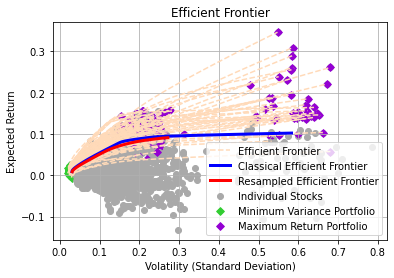

In [31]:
axC = plt.gca()
plt.rcParams['figure.figsize'] = [9, 8]
for i in range(repetition):
    # Plot volatility versus expected return for individual stocks
    axC.scatter(x=np.sqrt(np.diag(Q_resample_list[i])), y=mu_resample_list[i], color='darkgray', label='Individual Stocks' if i == 0 else "")
    
    # Plot volatility versus expected return for mimimum variance portfolio
    axC.scatter(x=np.sqrt(var_minVar_list[i]), y=ret_minVar_list[i], marker='D', s=30,  color='limegreen', label='Minimum Variance Portfolio' if i == 0 else "")

    # Plot volatility versus expected return for maximum return portfolio
    axC.scatter(x=np.sqrt(var_maxRet_list[i]), y=ret_maxRet_list[i],  marker='D', s=30, color='darkviolet', label='Maximum Return Portfolio' if i == 0 else "")

    # Plot efficient frontier
    axC.plot(np.sqrt(var_frontC_list[i]), ret_frontC_list[i], '--', color='peachpuff', label='Efficient Frontier' if i == 0 else "")

#Plot the classical mean-variance efficient frontier
axC.plot(np.sqrt(var_front_clas), ret_front_clas, color='blue', linewidth=3, label='Classical Efficient Frontier')

#Plot the resampled efficient frontier
axC.plot(np.sqrt(var_front_re_avg), ret_front_re_avg, color='red', linewidth=3, label='Resampled Efficient Frontier')

axC.set_xlabel('Volatility (Standard Deviation)')
axC.set_ylabel('Expected Return')
plt.title('Efficient Frontier')
axC.legend(loc="lower right")
axC.grid()
plt.show()

### 4. Plotting the portfolio compositions for classical and resampled frontiers. 

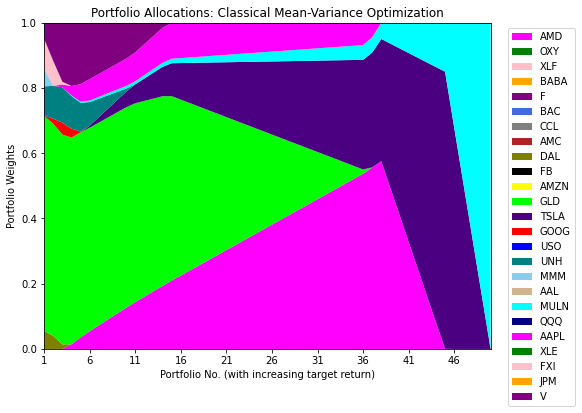

In [32]:
x_tick = np.arange(len(targetRet))+1
color_list = ['fuchsia','green','pink','orange','purple','royalblue','grey','firebrick','olive','black','yellow','lime','indigo','red','blue','teal','skyblue','tan','cyan','navy']
plt.figure(figsize=(8, 6))
plt.stackplot(x_tick, np.array(w_front_clas).T, colors=color_list)
plt.legend(df1.columns[1:], bbox_to_anchor=(1.2, 1))
plt.xlim((1,len(targetRet)))
plt.ylim((0,1))
plt.xticks(np.arange(1,len(targetRet)+1,5))
plt.xlabel("Portfolio No. (with increasing target return)")
plt.ylabel("Portfolio Weights")
plt.title("Portfolio Allocations: Classical Mean-Variance Optimization")
plt.show()

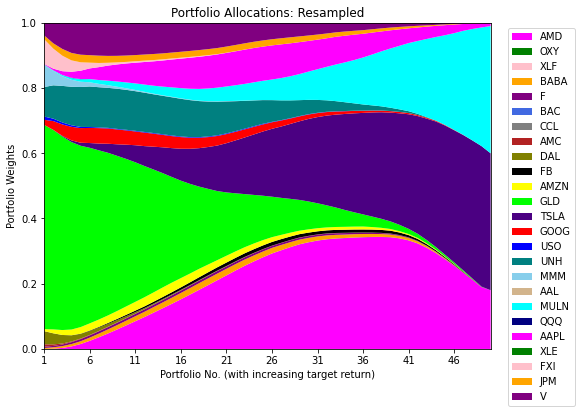

In [33]:
x_tick = np.arange(len(targetRet))+1
color_list = ['fuchsia','green','pink','orange','purple','royalblue','grey','firebrick','olive','black','yellow','lime','indigo','red','blue','teal','skyblue','tan','cyan','navy']
plt.figure(figsize=(8, 6))
plt.stackplot(x_tick, np.array(avg_weights).T, colors=color_list)
plt.legend(df1.columns[1:], bbox_to_anchor=(1.2, 1))
plt.xlim((1,len(targetRet)))
plt.ylim((0,1))
plt.xticks(np.arange(1,len(targetRet)+1,5))
plt.xlabel("Portfolio No. (with increasing target return)")
plt.ylabel("Portfolio Weights")
plt.title("Portfolio Allocations: Resampled")
plt.show()